In [73]:
#!pip install lightgbm


# House Prices - Advanced Regression Techniques

In [84]:
import pandas as pd

# Adjust Pandas settings to display everything
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

import numpy as np


from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.metrics import make_scorer, mean_squared_error


In [4]:
# Reading an CSV file
df = pd.read_csv('train.csv')
print(df.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
df.isna().sum(axis=1)

0       5
1       5
2       4
3       5
4       4
       ..
1455    5
1456    3
1457    3
1458    6
1459    6
Length: 1460, dtype: int64

In [11]:
# Total NaN values in the DataFrame
total_nan_count = df.isna().sum().sum()
print(total_nan_count)


7829


In [15]:
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [25]:
df[df.isna()].dtypes

Id               float64
MSSubClass       float64
MSZoning          object
LotFrontage      float64
LotArea          float64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual      float64
OverallCond      float64
YearBuilt        float64
YearRemodAdd     float64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object


In [23]:
df[~df.isna()].head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

In [24]:
df[~df['PoolQC'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,2Story,8,4,1918,1990,Gable,CompShg,Stucco,Stucco,NaN,0.0,Gd,Gd,PConc,TA,TA,No,GLQ,1036,LwQ,184,140,1360,GasA,Gd,Y,SBrkr,1360,1360,392,3112,1,1,2,0,4,1,Gd,8,Typ,1,Ex,Detchd,1918.0,Unf,2,795,TA,TA,Y,0,16,552,0,0,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1974,1999,Hip,CompShg,HdBoard,HdBoard,BrkFace,99.0,TA,TA,CBlock,TA,TA,No,ALQ,663,LwQ,377,0,1040,GasA,Fa,Y,SBrkr,1309,0,0,1309,1,0,1,1,3,1,Gd,5,Typ,1,Fa,Attchd,1974.0,RFn,2,484,TA,TA,Y,265,0,0,0,0,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1170,1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1977,1977,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,TA,TA,Av,ALQ,522,Unf,0,574,1096,GasA,TA,Y,SBrkr,1118,0,0,1118,1,0,1,0,3,1,TA,6,Typ,1,Po,Attchd,1977.0,Fin,1,358,TA,TA,Y,203,0,0,0,0,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,NaN,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,RRAn,Norm,1Fam,2Story,7,5,1978,1978,Gable,CompShg,Plywood,Plywood,BrkFace,184.0,TA,TA,CBlock,Gd,TA,No,BLQ,790,LwQ,469,133,1392,GasA,TA,Y,SBrkr,1392,1392,0,2784,1,0,3,1,5,1,Gd,12,Typ,2,TA,Attchd,1978.0,RFn,2,564,TA,TA,Y,0,112,0,0,440,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,SLvl,6,7,1966,1966,Flat,Tar&Grv,Plywood,Plywood,NaN,0.0,Gd,Gd,CBlock,Gd,TA,Av,Unf,0,Unf,0,697,697,GasA,TA,Y,SBrkr,1575,626,0,2201,0,0,2,0,4,1,Gd,8,Typ,1,Gd,Attchd,1966.0,Unf,2,432,Gd,Gd,Y,586,236,0,0,0,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


### Imputing NA Values
{
PoolQC            object
Fence             object
MiscFeature       object
Alley             object
FireplaceQu       object
MasVnrType        object
GarageType        object
GarageFinish      object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinType2      object
}

{
LotFrontage      float64
GarageYrBlt      float64
BsmtFinSF1       float64

}

In [28]:
# Forward fill
df_ffill = df.ffill()

# Backward fill
df_bfill = df.bfill()

In [30]:
print(df_ffill.head(5))


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

In [31]:
print(df_bfill.head(5))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Grvl      Reg   
1   2          20       RL         80.0     9600   Pave  Grvl      Reg   
2   3          60       RL         68.0    11250   Pave  Grvl      IR1   
3   4          70       RL         60.0     9550   Pave  Grvl      IR1   
4   5          60       RL         84.0    14260   Pave  Grvl      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

In [40]:
'''print(df_ffill.isna().any())
print(df_bfill.isna().any())'''
if df_ffill.isna().any().any():
    print('NA exist even by forward filling')
    print(df_ffill.isna().sum())
else:
    print('No NA by Forward Fill')
    
if df_bfill.isna().any().any():
    print('NA exist even by backward filling')
    print(df_bfill.isna().sum())
else:
    print('No NA by Backward Fill')

NA exist even by forward filling
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
Alley             21
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
G

In [44]:
df_ffill_bfill = df_bfill.ffill()
print(df_ffill_bfill.isna().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [49]:
data = df_ffill_bfill.copy()
# Correlation matrix
corr_matrix = data.corr(method='spearman')

ValueError: could not convert string to float: 'RL'

In [50]:
non_numeric_cols = data.select_dtypes(exclude=['number']).columns
print("Non-Numeric Columns:", non_numeric_cols)


Non-Numeric Columns: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [51]:
numeric_data = data.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr(method='spearman')
print(corr_matrix)


                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.019226    -0.029631 -0.005364    -0.028771   
MSSubClass     0.019226    1.000000    -0.273617 -0.269570     0.108065   
LotFrontage   -0.029631   -0.273617     1.000000  0.523980     0.208120   
LotArea       -0.005364   -0.269570     0.523980  1.000000     0.233303   
OverallQual   -0.028771    0.108065     0.208120  0.233303     1.000000   
OverallCond    0.003622   -0.071770    -0.051925 -0.046912    -0.177521   
YearBuilt     -0.005130    0.035848     0.157881  0.103385     0.647392   
YearRemodAdd  -0.011680    0.006802     0.095735  0.075158     0.557723   
MasVnrArea    -0.039330    0.025073     0.197986  0.176735     0.407640   
BsmtFinSF1    -0.013038   -0.107629     0.132099  0.171995     0.132957   
BsmtFinSF2    -0.006736   -0.083871     0.049109  0.072019    -0.117560   
BsmtUnfSF     -0.009509   -0.117603     0.091781  0.077830     0.272939   
TotalBsmtSF   -0.033187  

## Feature Selection with co-relation

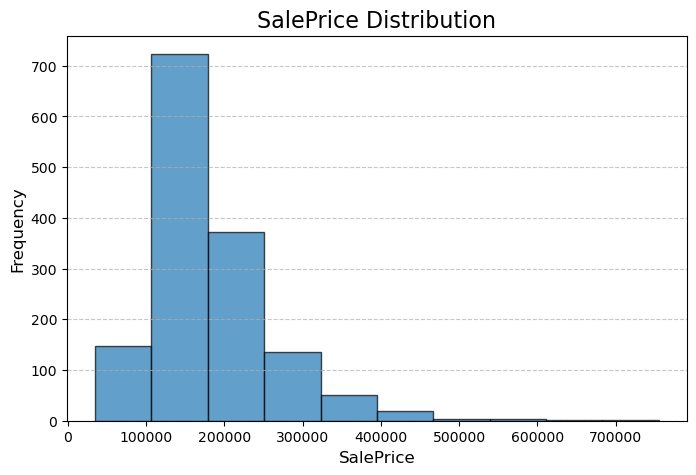

In [56]:
# Plotting SalePrice distribution
plt.figure(figsize=(8, 5))
plt.hist(data['SalePrice'], bins=10, edgecolor='k', alpha=0.7)
plt.title('SalePrice Distribution', fontsize=16)
plt.xlabel('SalePrice', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [53]:


def variable_selection(df, target_col, corr_threshold=0.3, multicollinearity_threshold=0.8):
    """
    Perform variable selection based on correlation with the target and inter-feature correlation.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame.
        target_col (str): The target column name.
        corr_threshold (float): Minimum absolute correlation with the target to consider a feature.
        multicollinearity_threshold (float): Maximum pairwise correlation between features to avoid redundancy.

    Returns:
        selected_features (list): List of selected feature names.
        feature_importances (pd.DataFrame): Feature importance scores from Random Forest.
    """
    # Step 1: Handle non-numeric data
    non_numeric_cols = df.select_dtypes(exclude=['number']).columns
    for col in non_numeric_cols:
        if col != target_col:  # Skip the target column
            df[col] = LabelEncoder().fit_transform(df[col])

    # Step 2: Calculate correlation with the target
    corr_matrix = df.corr()
    target_corr = corr_matrix[target_col].drop(target_col)  # Drop target self-correlation
    selected_features = target_corr[abs(target_corr) > corr_threshold].index.tolist()

    print("Features with good correlation to the target:\n", selected_features)

    # Step 3: Handle multicollinearity
    selected_corr_matrix = corr_matrix.loc[selected_features, selected_features]
    to_remove = set()
    for i in range(len(selected_corr_matrix)):
        for j in range(i + 1, len(selected_corr_matrix)):
            if abs(selected_corr_matrix.iloc[i, j]) > multicollinearity_threshold:
                # Remove the less correlated feature with the target
                if abs(target_corr[selected_corr_matrix.index[i]]) < abs(target_corr[selected_corr_matrix.index[j]]):
                    to_remove.add(selected_corr_matrix.index[i])
                else:
                    to_remove.add(selected_corr_matrix.index[j])

    selected_features = [feature for feature in selected_features if feature not in to_remove]
    print("Features after handling multicollinearity:\n", selected_features)

    # Step 4: Feature importance using Random Forest
    X = df[selected_features]
    y = df[target_col]

    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)
    importances = model.feature_importances_
    feature_importances = pd.DataFrame({'Feature': selected_features, 'Importance': importances}).sort_values(
        by='Importance', ascending=False
    )
    print("\nFeature Importances:\n", feature_importances)

    return selected_features, feature_importances



In [65]:
selected_features, feature_importances = variable_selection(data, target_col='SalePrice', corr_threshold=0.2, multicollinearity_threshold=0.9)

Features with good correlation to the target:
 ['LotFrontage', 'LotArea', 'LotShape', 'Neighborhood', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'SaleCondition']
Features after handling multicollinearity:
 ['LotFrontage', 'LotArea', 'LotShape', 'Neighborhood', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'Gar

In [66]:
X=data[selected_features]
y=data['SalePrice']

In [67]:
X.dtypes


LotFrontage      float64
LotArea            int64
LotShape           int64
Neighborhood       int64
OverallQual        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle          int64
MasVnrArea       float64
ExterQual          int64
Foundation         int64
BsmtQual           int64
BsmtExposure       int64
BsmtFinSF1         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
HeatingQC          int64
CentralAir         int64
Electrical         int64
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
BsmtFullBath       int64
FullBath           int64
HalfBath           int64
KitchenQual        int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageType         int64
GarageYrBlt      float64
GarageFinish       int64
GarageCars         int64
GarageArea         int64
PavedDrive         int64
WoodDeckSF         int64
OpenPorchSF        int64
SaleCondition      int64
dtype: object

In [70]:
'''# Plot 1: Pairplot for selected features and target
sns.pairplot(data=pd.concat([X, y], axis=1), diag_kind='kde')
plt.suptitle('Pairplot of Selected Features and SalePrice', y=1.02, fontsize=16)
plt.show()'''

"# Plot 1: Pairplot for selected features and target\nsns.pairplot(data=pd.concat([X, y], axis=1), diag_kind='kde')\nplt.suptitle('Pairplot of Selected Features and SalePrice', y=1.02, fontsize=16)\nplt.show()"

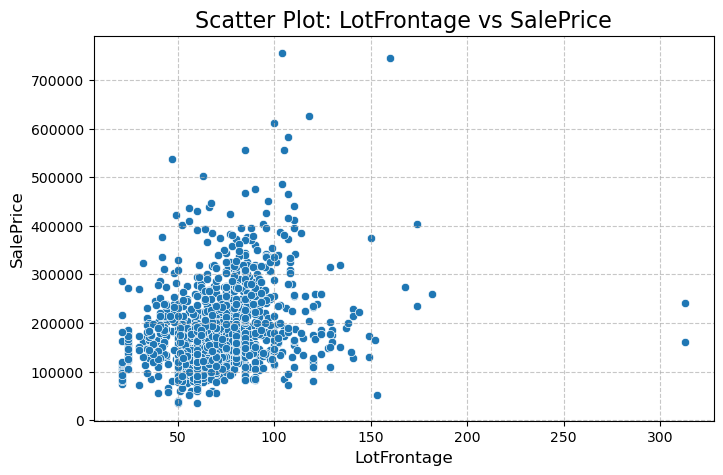

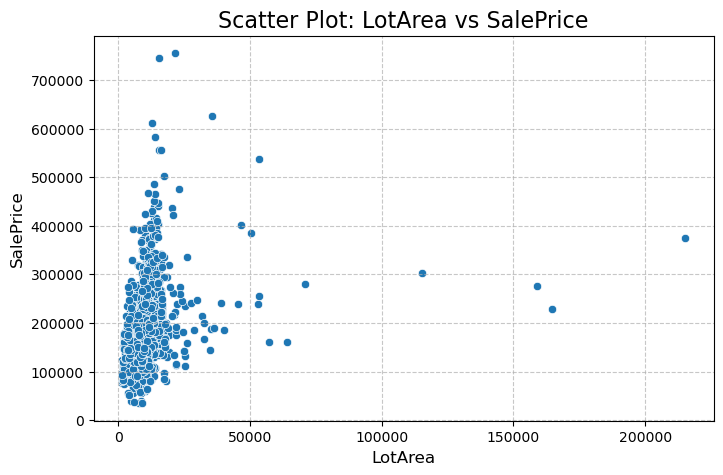

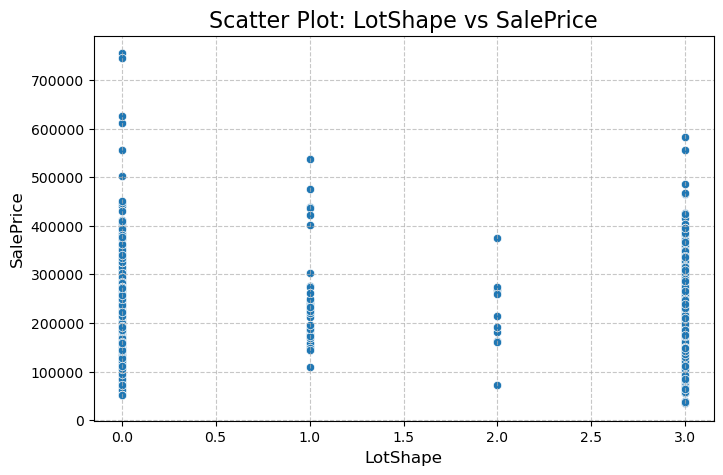

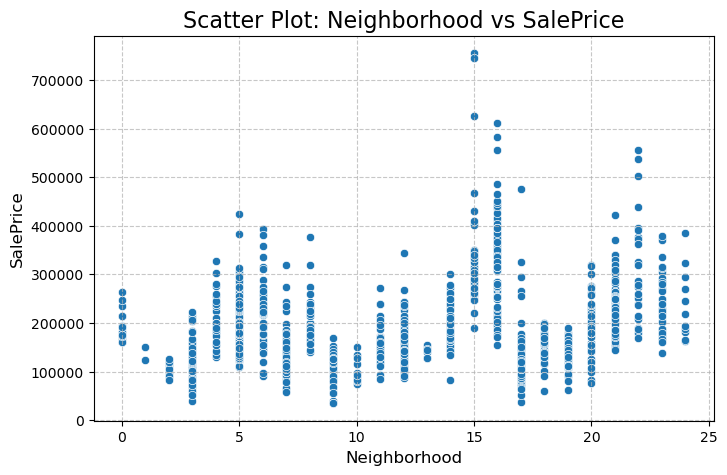

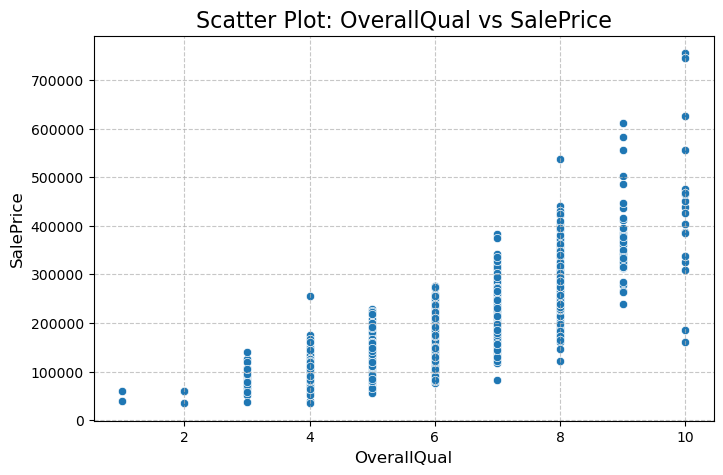

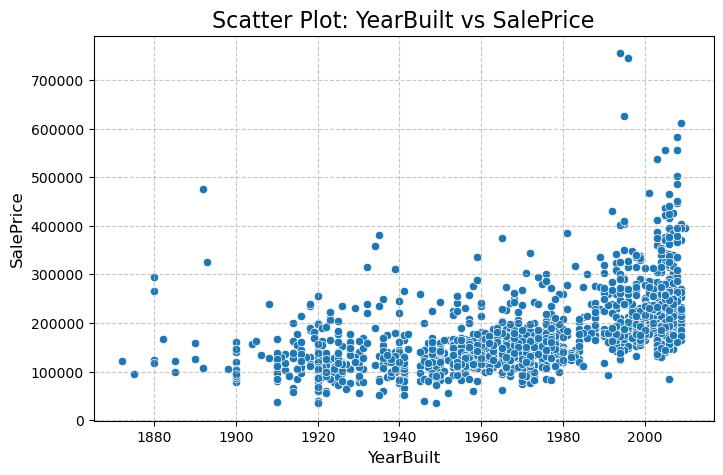

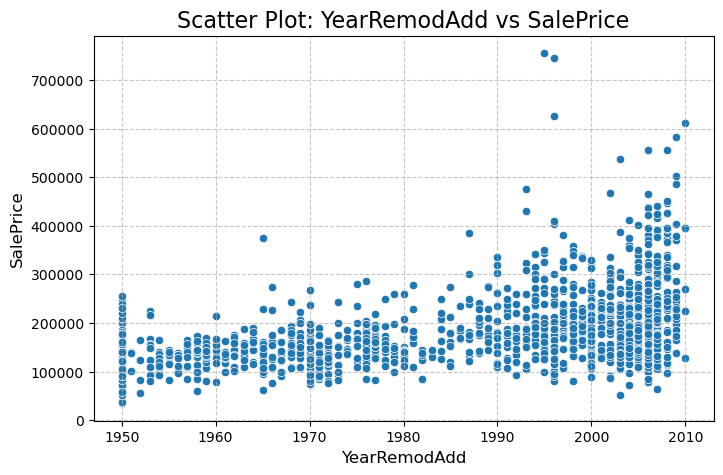

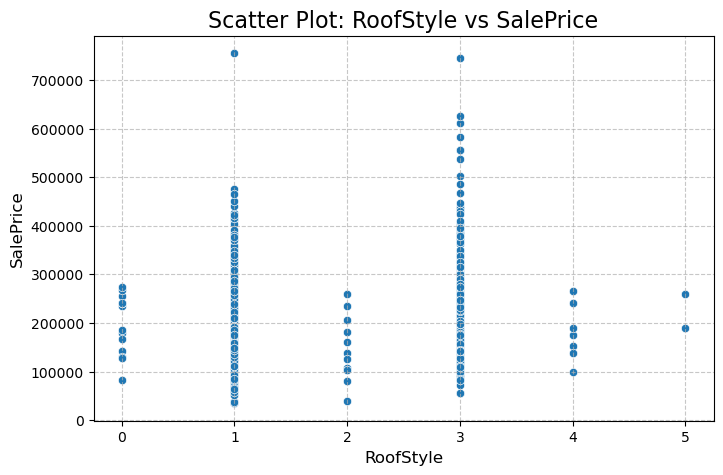

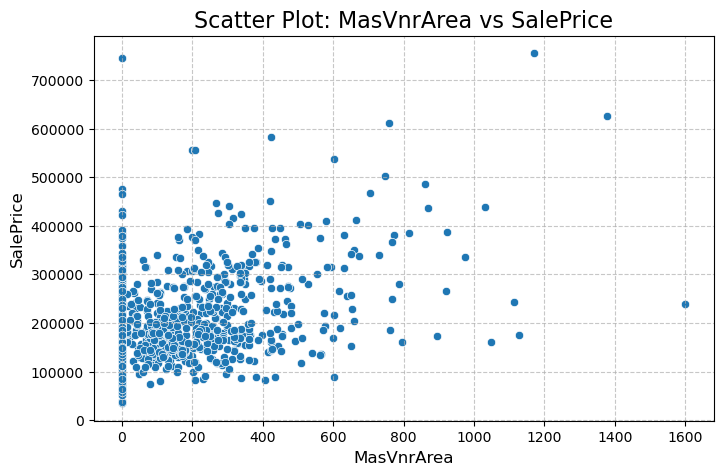

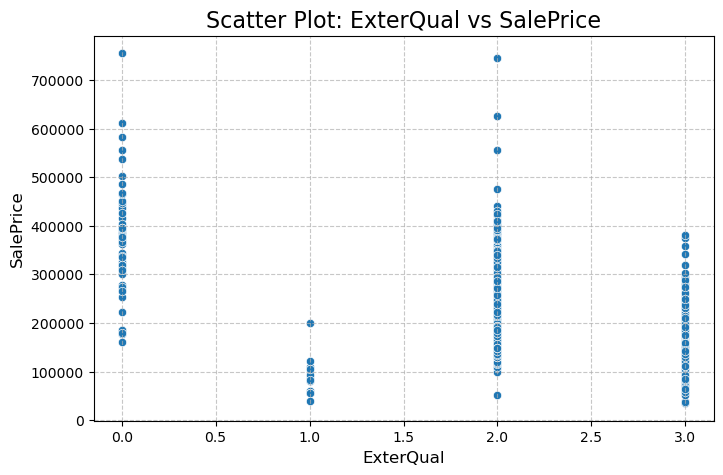

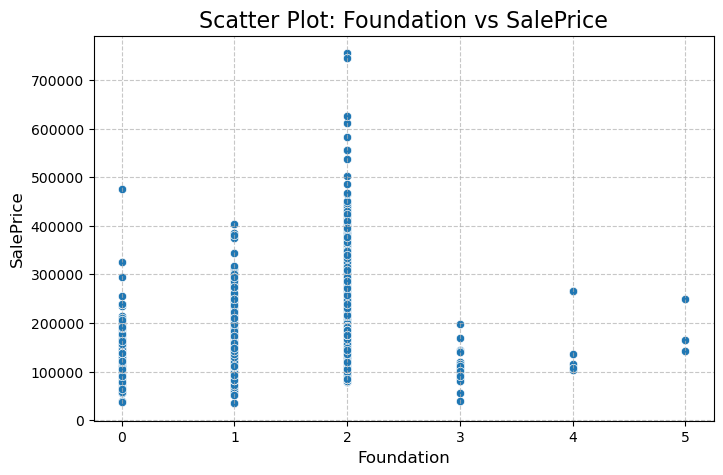

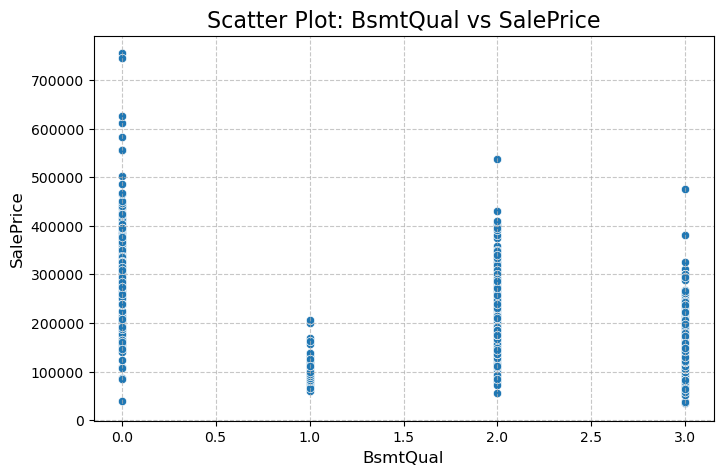

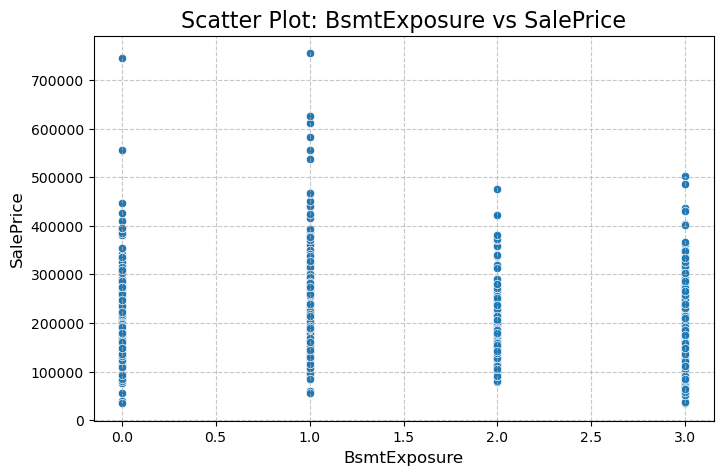

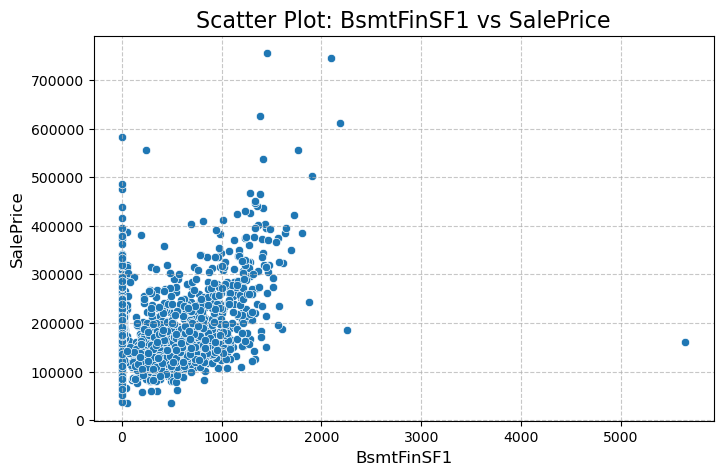

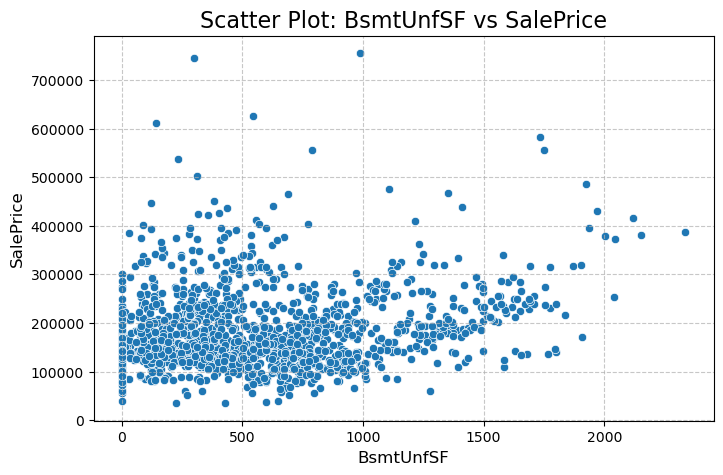

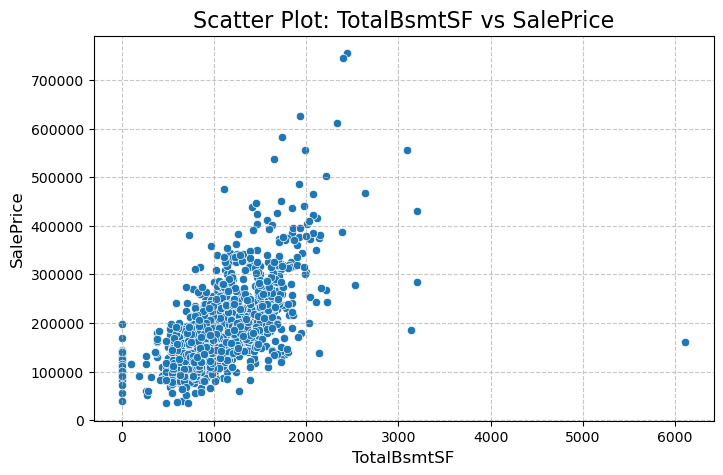

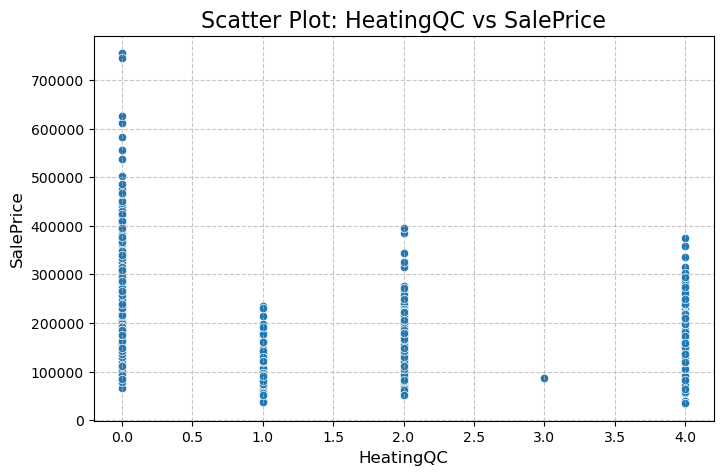

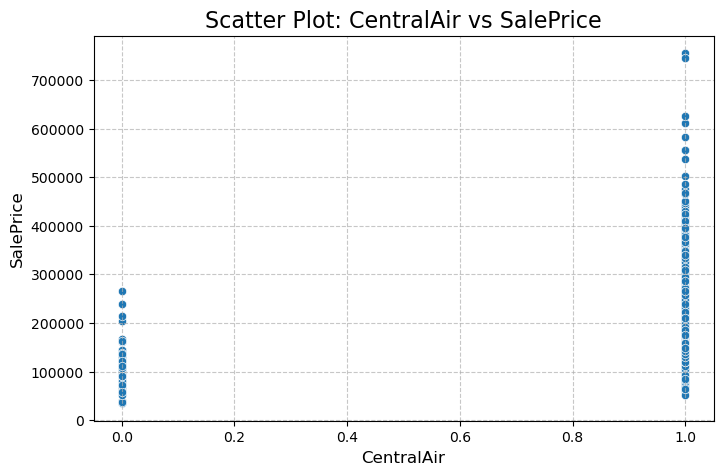

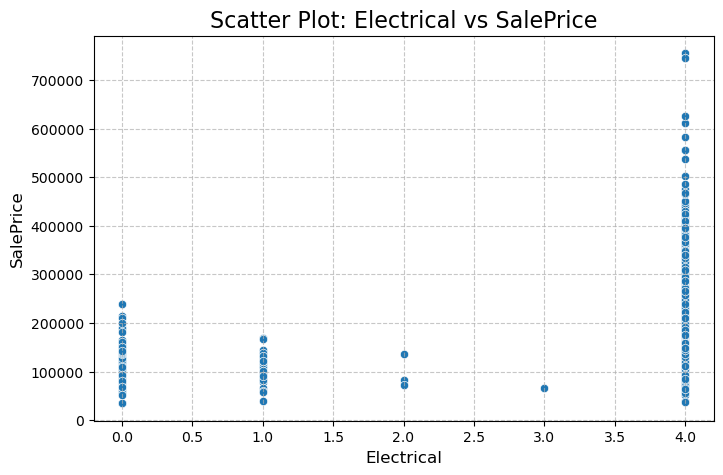

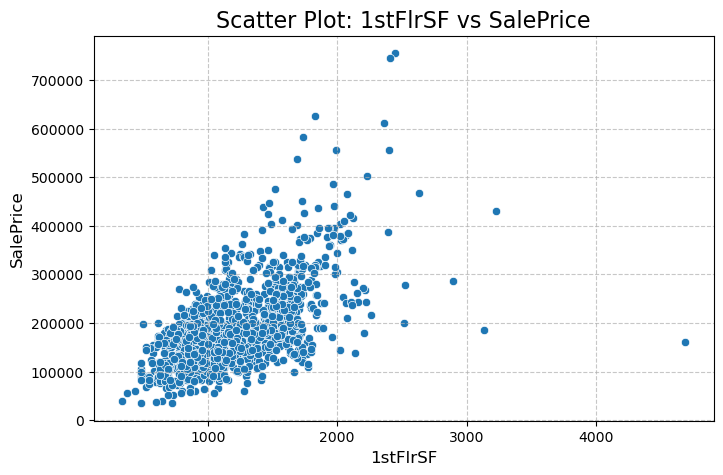

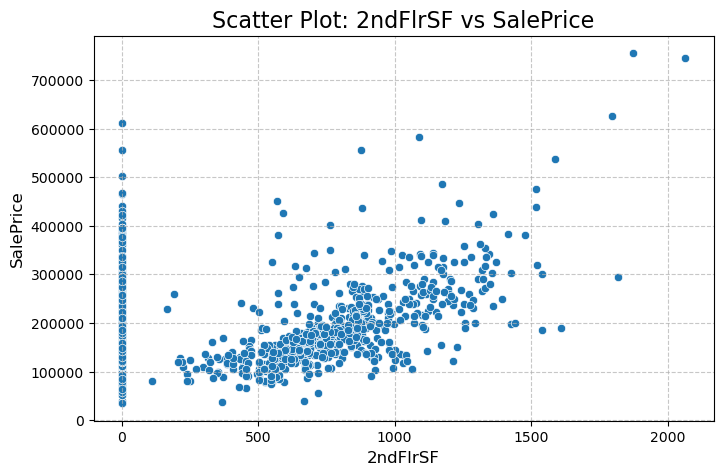

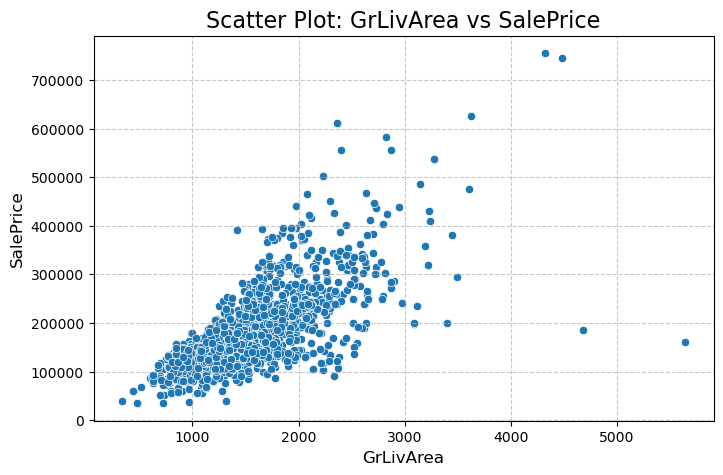

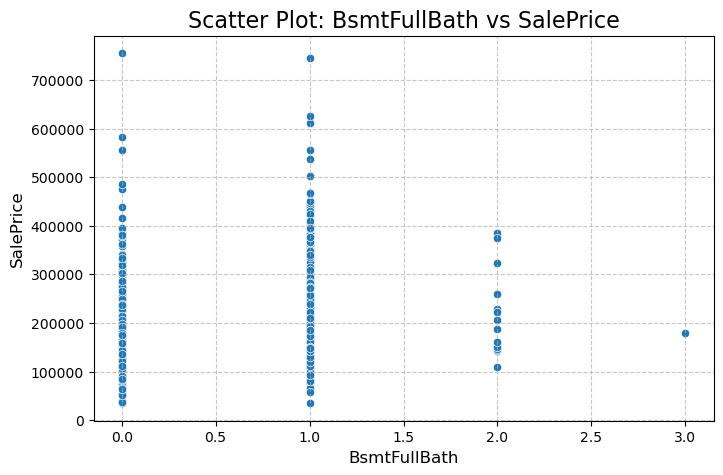

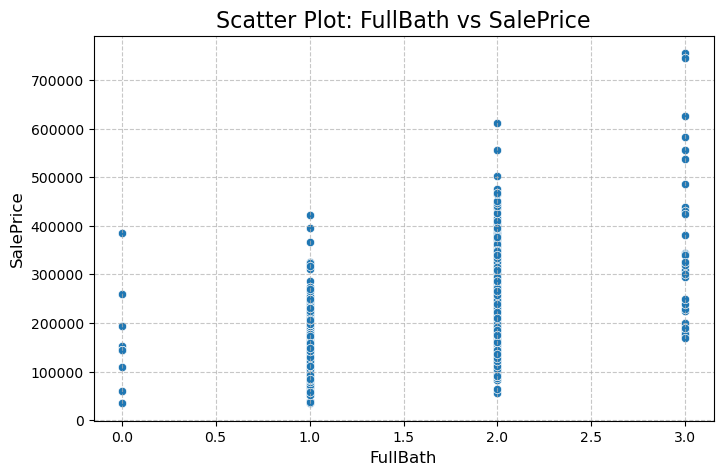

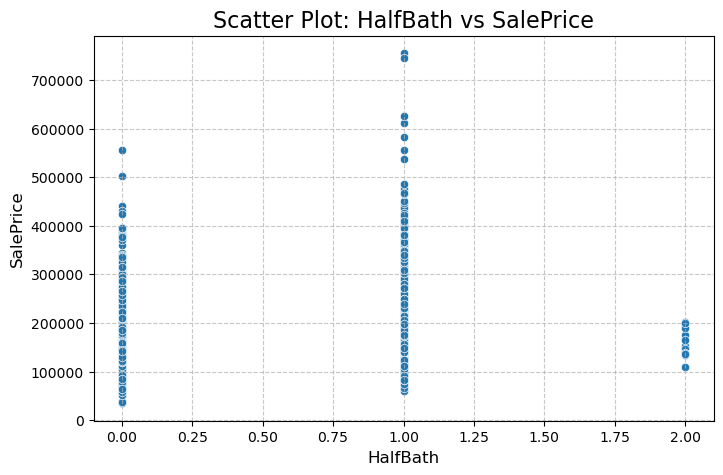

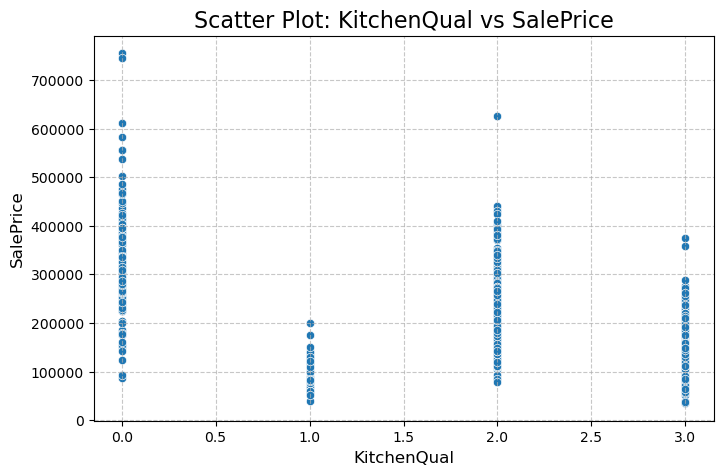

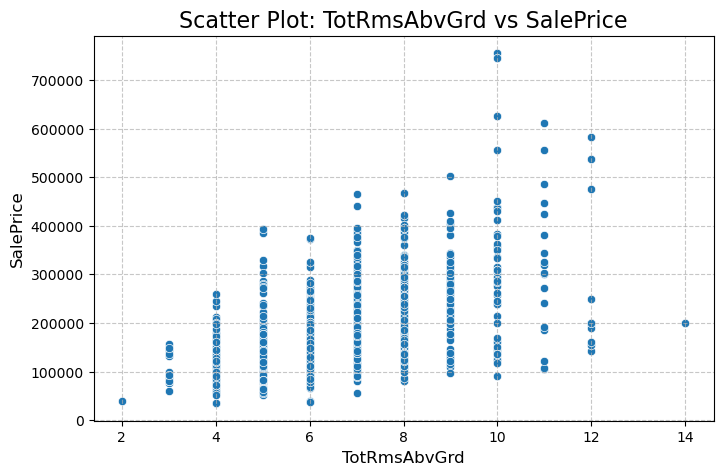

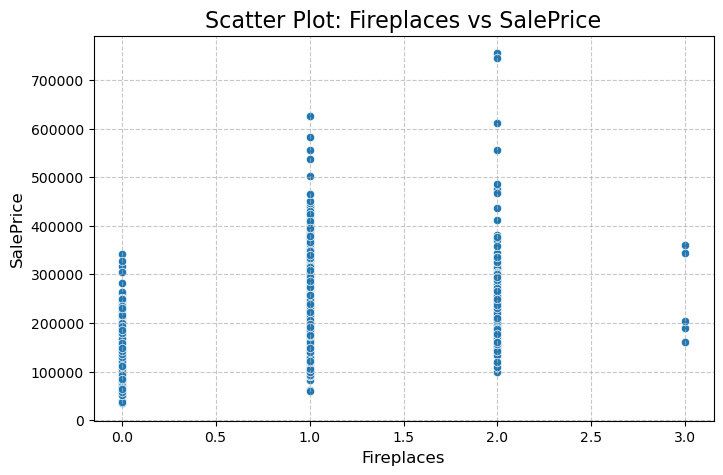

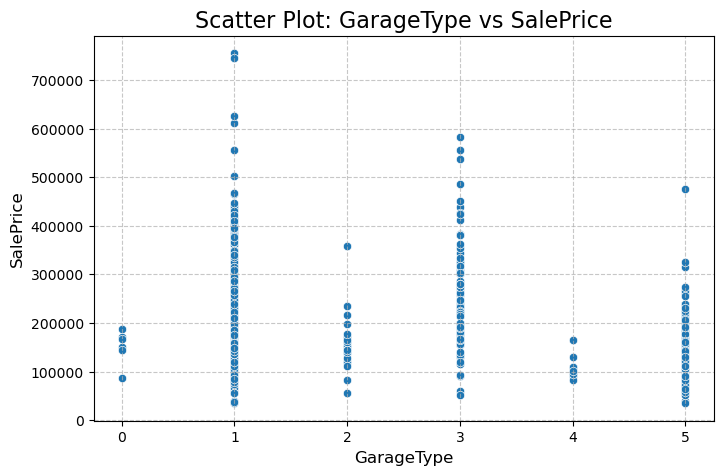

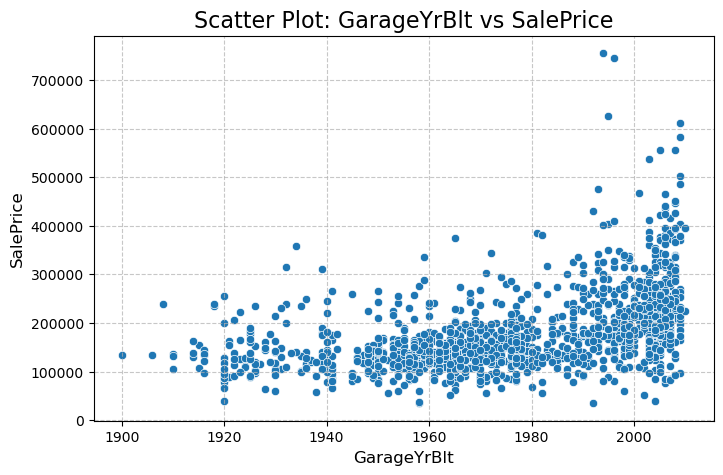

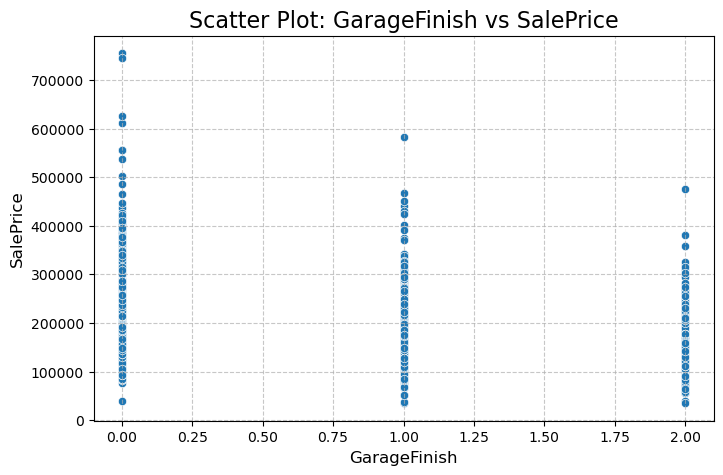

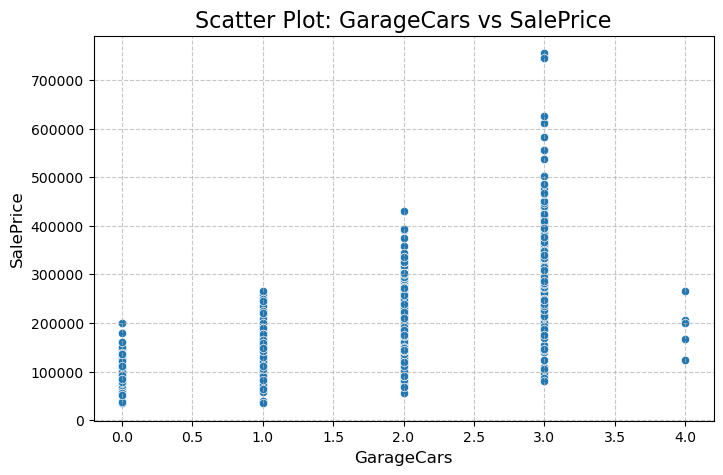

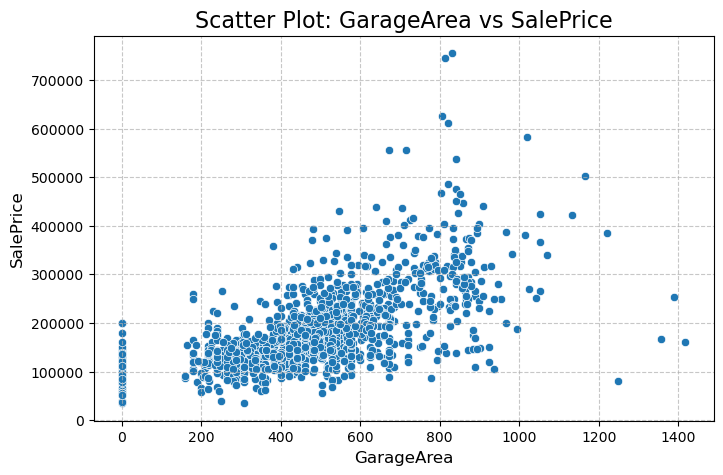

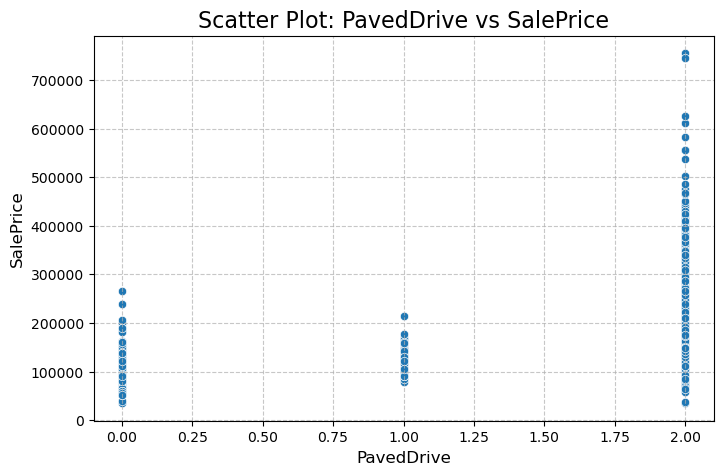

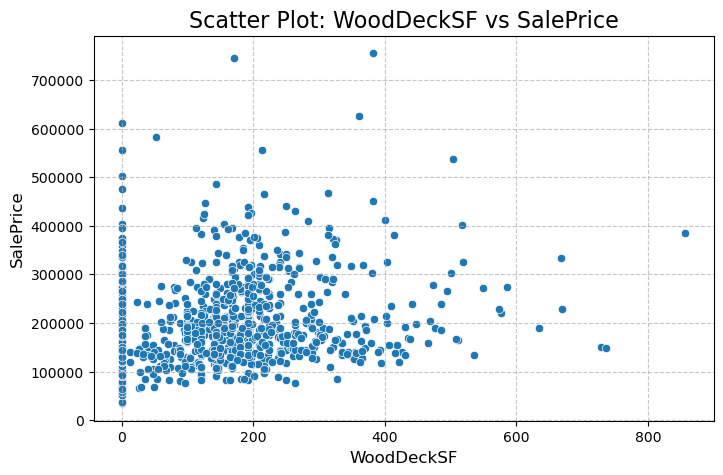

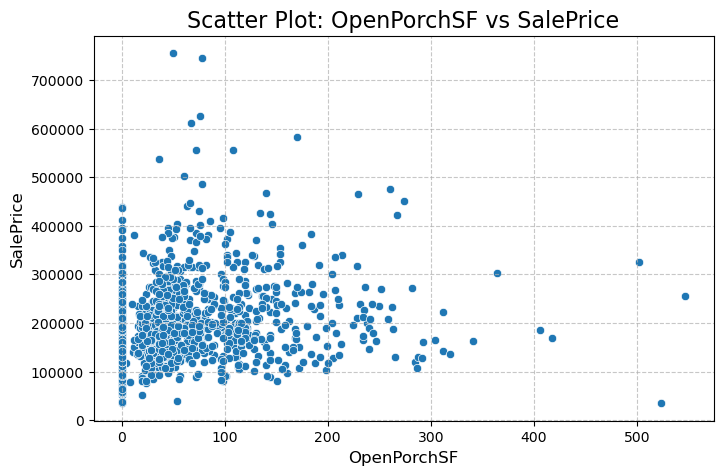

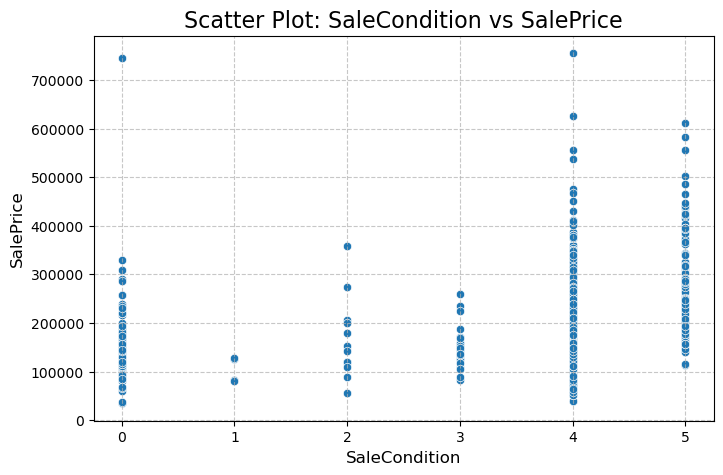

In [71]:
# Plot 2: Scatter plot for each feature vs. target
for feature in selected_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=X[feature], y=y)
    plt.title(f'Scatter Plot: {feature} vs SalePrice', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('SalePrice', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

In [89]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)


y_pred_log = np.log(y_pred)

# Evaluate the model
mae = mean_absolute_error(y_test_log, y_pred_log)
mse = mean_squared_error(y_test_log, y_pred_log)
rmse = mse ** 0.5
r2 = r2_score(y_test_log, y_pred_log)

# Print evaluation metrics
print(f"XGBoost Performance Metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

XGBoost Performance Metrics:
MAE: 0.10230415614457689
MSE: 0.0232034265828844
RMSE: 0.15232671001135814
R²: 0.8756605266288304


In [87]:
# Define the parameter search space
param_space = {
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'max_depth': Integer(3, 10),
    'n_estimators': Integer(50, 500),
    'colsample_bytree': Real(0.5, 1.0, prior='uniform'),
    'subsample': Real(0.5, 1.0, prior='uniform')
}

# Define the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the scoring metric
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Setup BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=xgb_model,
    search_spaces=param_space,
    n_iter=50,  # Number of parameter settings to sample
    cv=10,       # 3-fold cross-validation
    scoring=scorer,
    random_state=42,
    verbose=1
)


In [90]:
# Perform the search
bayes_search.fit(X_train, y_train)

# Output the best parameters and score
print("Best Parameters:", bayes_search.best_params_)
print("Best CV Score:", -bayes_search.best_score_)

# Train the final model with the best parameters
best_model = bayes_search.best_estimator_

# Evaluate on the test set
y_pred = best_model.predict(X_test)

y_pred_log = np.log(y_pred)

rmse = mean_squared_error(y_test_log, y_pred_log, squared=False)
print(f"Optimized RMSE on test set: {rmse}")

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

/Users/pranavsrinivasvenkatesh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [92]:
df_test = pd.read_csv('test.csv')
df_test.isna().sum()


Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType        894
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [104]:
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [93]:
# Backward fill
df_test_bfill = df_test.bfill()
df_test_ffill_bfill = df_test_bfill.ffill()
print(df_test_ffill_bfill.isna().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [94]:
filled_df_test = df_test_ffill_bfill.copy()


In [98]:
filled_df_test.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object


In [101]:
non_numeric_cols = filled_df_test.select_dtypes(exclude=['number']).columns
for col in non_numeric_cols:
    #if col != target_col:  # Skip the target column
    filled_df_test[col] = LabelEncoder().fit_transform(filled_df_test[col])

In [102]:
filled_df_test.dtypes

Id                 int64
MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotArea            int64
Street             int64
Alley              int64
LotShape           int64
LandContour        int64
Utilities          int64
LotConfig          int64
LandSlope          int64
Neighborhood       int64
Condition1         int64
Condition2         int64
BldgType           int64
HouseStyle         int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle          int64
RoofMatl           int64
Exterior1st        int64
Exterior2nd        int64
MasVnrType         int64
MasVnrArea       float64
ExterQual          int64
ExterCond          int64
Foundation         int64
BsmtQual           int64
BsmtCond           int64
BsmtExposure       int64
BsmtFinType1       int64
BsmtFinSF1       float64
BsmtFinType2       int64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating            int64


In [103]:
X_df_test = filled_df_test[selected_features]
#y_df_test = filled_df_test['SelectedPrice']
#y_df_test_log = np.log(y_df_test)

y_pred_df_test = best_model.predict(X_df_test)
#y_pred_df_test_log = np.log(y_pred_df_test)


#rmse = mean_squared_error(y_df_test_log, y_pred_df_test_log, squared=False)

In [106]:
print(X_df_test.shape)
print(y_pred_df_test.shape)

(1459, 37)
(1459,)


In [120]:
merged_pred = pd.concat([filled_df_test,pd.DataFrame(y_pred_df_test)], axis=1)

In [121]:
merged_pred.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,0
0,1461,20,2,80.0,11622,1,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,10,12,1,0.0,3,4,1,3,3,3,4,468.0,3,144.0,270.0,882.0,0,4,1,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,6,0,4,1,1961.0,2,1.0,730.0,3,4,2,140,0,0,0,120,0,0,2,0,0,6,2010,8,4,127216.765625
1,1462,20,3,81.0,14267,1,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,11,13,1,108.0,3,4,1,3,3,3,0,923.0,5,0.0,406.0,1329.0,0,4,1,3,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,6,0,4,1,1958.0,2,1.0,312.0,3,4,2,393,36,0,0,0,0,0,2,0,12500,6,2010,8,4,165688.734375
2,1463,60,3,74.0,13830,1,1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,10,12,1,0.0,3,4,2,2,3,3,2,791.0,5,0.0,137.0,928.0,0,2,1,3,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,6,1,4,1,1997.0,0,2.0,482.0,3,4,2,212,34,0,0,0,0,0,2,2,0,3,2010,8,4,184040.109375
3,1464,60,3,78.0,9978,1,1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,10,12,1,20.0,3,4,2,3,3,3,2,602.0,5,0.0,324.0,926.0,0,0,1,3,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,6,1,2,1,1998.0,0,2.0,470.0,3,4,2,360,36,0,0,0,0,0,0,2,0,6,2010,8,4,189833.953125
4,1465,120,3,43.0,5005,1,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,6,6,1,0.0,2,4,2,2,3,3,0,263.0,5,0.0,1017.0,1280.0,0,0,1,3,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,6,0,4,1,1992.0,1,2.0,506.0,3,4,2,0,82,0,0,144,0,0,0,2,0,1,2010,8,4,196522.687500


In [122]:
merged_pred.columns

Index([           'Id',    'MSSubClass',      'MSZoning',   'LotFrontage',
             'LotArea',        'Street',         'Alley',      'LotShape',
         'LandContour',     'Utilities',     'LotConfig',     'LandSlope',
        'Neighborhood',    'Condition1',    'Condition2',      'BldgType',
          'HouseStyle',   'OverallQual',   'OverallCond',     'YearBuilt',
        'YearRemodAdd',     'RoofStyle',      'RoofMatl',   'Exterior1st',
         'Exterior2nd',    'MasVnrType',    'MasVnrArea',     'ExterQual',
           'ExterCond',    'Foundation',      'BsmtQual',      'BsmtCond',
        'BsmtExposure',  'BsmtFinType1',    'BsmtFinSF1',  'BsmtFinType2',
          'BsmtFinSF2',     'BsmtUnfSF',   'TotalBsmtSF',       'Heating',
           'HeatingQC',    'CentralAir',    'Electrical',      '1stFlrSF',
            '2ndFlrSF',  'LowQualFinSF',     'GrLivArea',  'BsmtFullBath',
        'BsmtHalfBath',      'FullBath',      'HalfBath',  'BedroomAbvGr',
        'KitchenAbvGr',  

In [123]:
merged_pred.rename(columns={0:'SalePrice'}, inplace=True)
merged_pred.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,2,80.0,11622,1,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,10,12,1,0.0,3,4,1,3,3,3,4,468.0,3,144.0,270.0,882.0,0,4,1,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,6,0,4,1,1961.0,2,1.0,730.0,3,4,2,140,0,0,0,120,0,0,2,0,0,6,2010,8,4,127216.765625
1,1462,20,3,81.0,14267,1,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,11,13,1,108.0,3,4,1,3,3,3,0,923.0,5,0.0,406.0,1329.0,0,4,1,3,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,6,0,4,1,1958.0,2,1.0,312.0,3,4,2,393,36,0,0,0,0,0,2,0,12500,6,2010,8,4,165688.734375
2,1463,60,3,74.0,13830,1,1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,10,12,1,0.0,3,4,2,2,3,3,2,791.0,5,0.0,137.0,928.0,0,2,1,3,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,6,1,4,1,1997.0,0,2.0,482.0,3,4,2,212,34,0,0,0,0,0,2,2,0,3,2010,8,4,184040.109375
3,1464,60,3,78.0,9978,1,1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,10,12,1,20.0,3,4,2,3,3,3,2,602.0,5,0.0,324.0,926.0,0,0,1,3,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,6,1,2,1,1998.0,0,2.0,470.0,3,4,2,360,36,0,0,0,0,0,0,2,0,6,2010,8,4,189833.953125
4,1465,120,3,43.0,5005,1,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,6,6,1,0.0,2,4,2,2,3,3,0,263.0,5,0.0,1017.0,1280.0,0,0,1,3,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,6,0,4,1,1992.0,1,2.0,506.0,3,4,2,0,82,0,0,144,0,0,0,2,0,1,2010,8,4,196522.687500


In [126]:
final_pred = merged_pred[['Id','SalePrice']]
final_pred

,Id,SalePrice
0,1461,127216.765625
1,1462,165688.734375
2,1463,184040.109375
3,1464,189833.953125
4,1465,196522.687500
5,1466,174148.156250
6,1467,177262.875000
7,1468,167047.265625
8,1469,175924.562500
9,1470,127706.546875


In [127]:
final_pred.to_csv('final_pred.csv', index=False)